In [7]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados

In [8]:
import pandas as pd

base= pd.read_csv('iris.csv')
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
Entrada = base.iloc[:, 0:4].values
Entrada.shape

(150, 4)

In [10]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
Entrada = scaler.fit_transform(Entrada)

In [11]:
Entrada

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [12]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((Entrada.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada)
    pred = model.predict(Entrada)
    score = silhouette_score(Entrada, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.629
Silhouette Score k = 3: 0.504
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.368
Silhouette Score k = 6: 0.341
Silhouette Score k = 7: 0.326
Silhouette Score k = 8: 0.317


In [13]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada)
  wcss.append(kmeans.inertia_)

**Usando o método Elbow para encontrar o número ideal de clusters**

In [14]:
wcss

[12.143688281579719,
 7.138647703985377,
 5.549759171192483,
 4.999716015487786,
 4.435974100749334,
 4.148564120879137,
 3.152308877970635,
 3.0668244428901104,
 2.7463599552773736]

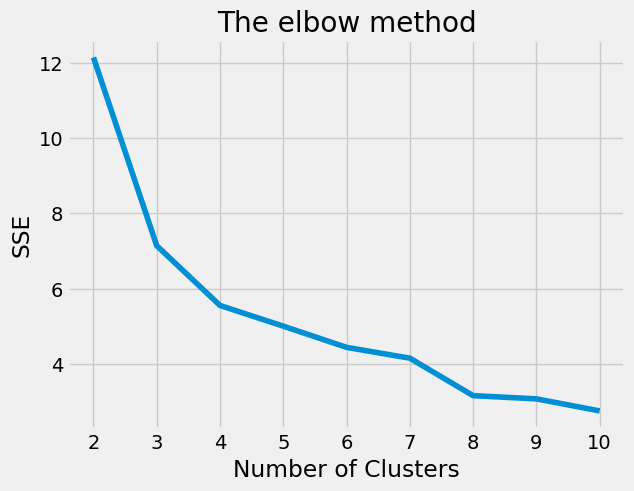

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [17]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Carregando a base de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicando o algoritmo K-Means para criar os clusters
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Calculando o Índice de Davies-Bouldin
dbi = davies_bouldin_score(X, y_kmeans)
print(f'Índice de Davies-Bouldin: {dbi}')

Índice de Davies-Bouldin: 0.6660385791628493


In [18]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [19]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada)

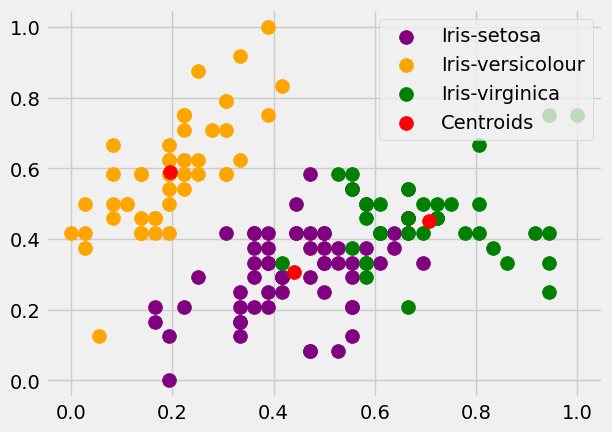

In [20]:
#Visualising the clusters
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

Índice de Davies-Bouldin: 0.6660385791628493


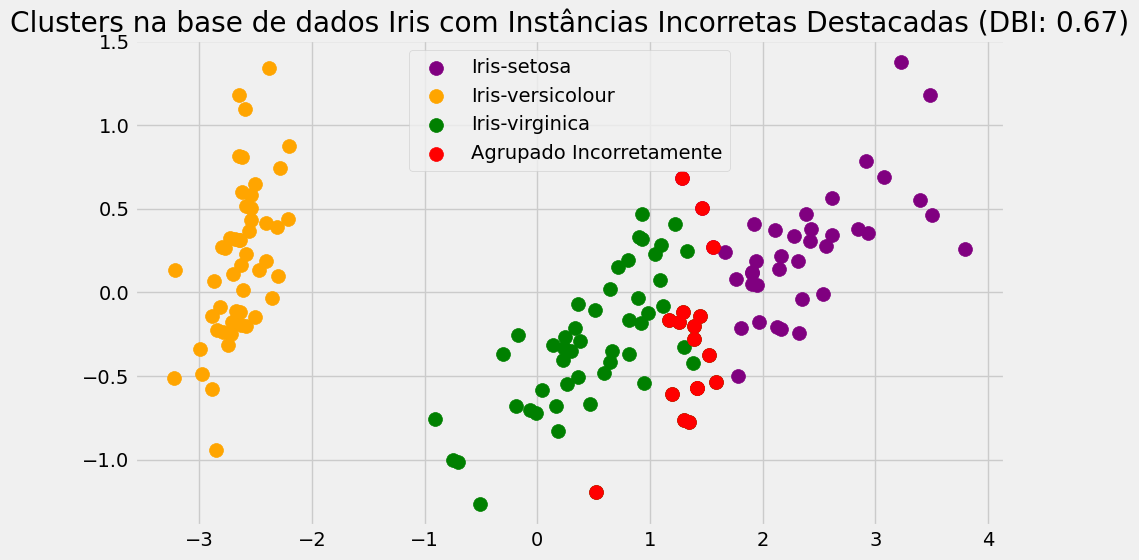

In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import mode

# Carregando a base de dados Iris
iris = load_iris()
X = iris.data
y = iris.target
true_labels = iris.target_names[y]

# Aplicando o algoritmo K-Means para criar os clusters
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Calculando o Índice de Davies-Bouldin
dbi = davies_bouldin_score(X, y_kmeans)
print(f'Índice de Davies-Bouldin: {dbi}')

# Mapeando os clusters para as classes verdadeiras
def map_clusters_to_labels(y_true, y_clusters):
    labels = np.zeros_like(y_clusters)
    for i in range(np.max(y_clusters) + 1):
        mask = (y_clusters == i)
        if np.any(mask):
            labels[mask] = mode(y_true[mask])[0]
    return labels

mapped_labels = map_clusters_to_labels(y, y_kmeans)

# Verificando instâncias incorretamente agrupadas
incorrect = mapped_labels != y

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criando um DataFrame para facilitar a visualização
df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df['True Label'] = true_labels
df['Cluster'] = y_kmeans
df['Mapped Label'] = iris.target_names[mapped_labels]
df['Incorrect'] = incorrect

# Visualizando os clusters em 2D destacando as instâncias incorretas
plt.figure(figsize=(10, 6))
plt.scatter(df.loc[df['Cluster'] == 0, 'PCA1'], df.loc[df['Cluster'] == 0, 'PCA2'], s=100, c='purple', label='Iris-setosa')
plt.scatter(df.loc[df['Cluster'] == 1, 'PCA1'], df.loc[df['Cluster'] == 1, 'PCA2'], s=100, c='orange', label='Iris-versicolour')
plt.scatter(df.loc[df['Cluster'] == 2, 'PCA1'], df.loc[df['Cluster'] == 2, 'PCA2'], s=100, c='green', label='Iris-virginica')
# Destacando as instâncias incorretamente agrupadas
plt.scatter(df.loc[df['Incorrect'], 'PCA1'], df.loc[df['Incorrect'], 'PCA2'], s=100, c='red', label='Agrupado Incorretamente')

plt.title(f'Clusters na base de dados Iris com Instâncias Incorretas Destacadas (DBI: {dbi:.2f})')
plt.legend()
plt.show()


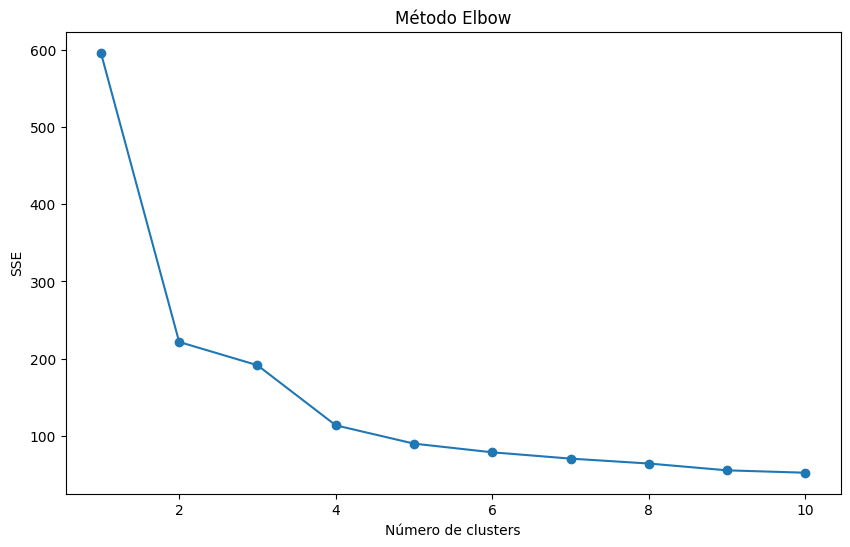

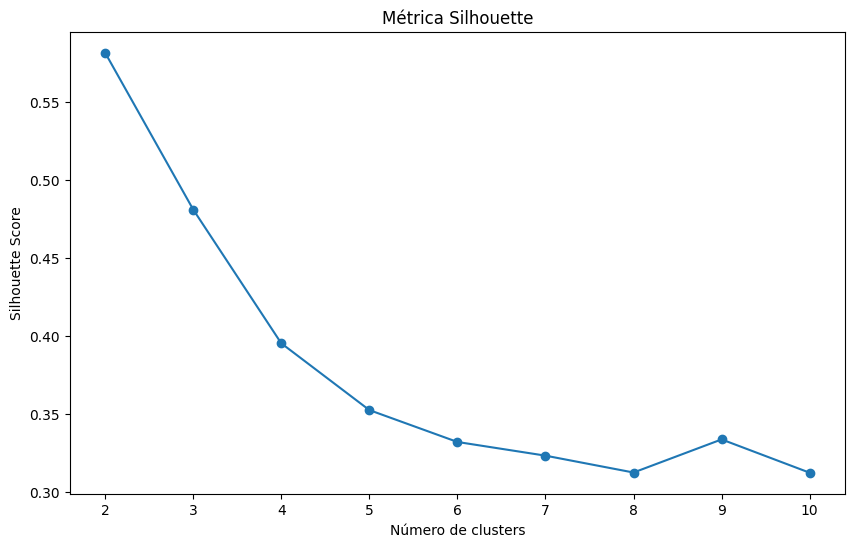

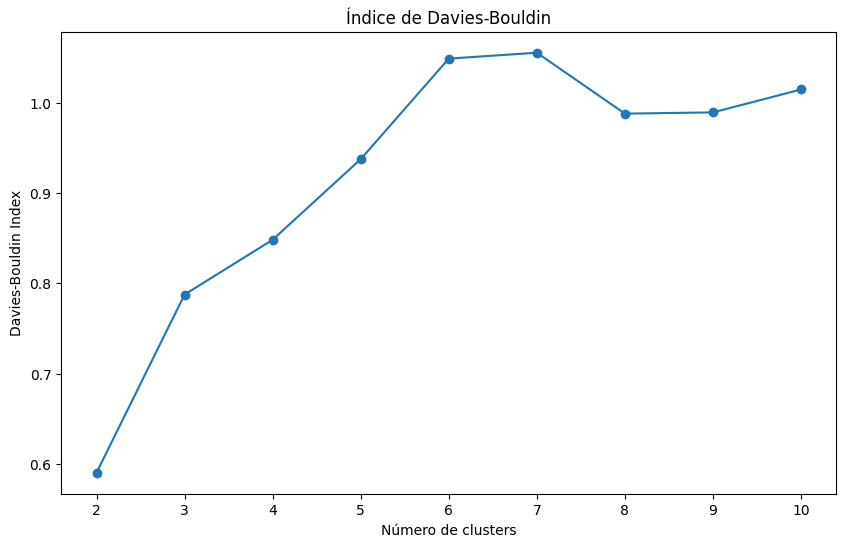

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Carregar a base de dados Iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Identificação de outliers usando o Z-score
z_scores = np.abs(stats.zscore(data.iloc[:, :-1]))
outliers = np.where(z_scores > 3)

# Removendo outliers
data_clean = data[(z_scores < 3).all(axis=1)]

# Normalização dos dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clean.iloc[:, :-1])

data_normalized = pd.DataFrame(data_normalized, columns=iris['feature_names'])
data_normalized['target'] = data_clean['target'].values

# Encontrar o melhor número de clusters usando o método Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized.iloc[:, :-1])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método Elbow')
plt.show()

# Encontrar o melhor número de clusters usando a métrica Silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized.iloc[:, :-1])
    score = silhouette_score(data_normalized.iloc[:, :-1], kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Métrica Silhouette')
plt.show()

# Implementação do índice de Davies-Bouldin
davies_bouldin_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized.iloc[:, :-1])
    score = davies_bouldin_score(data_normalized.iloc[:, :-1], kmeans.labels_)
    davies_bouldin_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Índice de Davies-Bouldin')
plt.show()
